In [12]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, silhouette_samples
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("q4-data.csv")

X = df.drop(columns="Label")
y = df.Label

In [23]:
km = KMeans(3)
km.fit(X)
labels = km.predict(X)
silhouette_score(X, labels)

0.8053849031578427

In [24]:
s = silhouette_samples(X, labels)
for c in range(3):
    print(c, s[labels==c].mean())

0 0.9092926606741881
1 0.7059172030528353
2 0.9004125458515119


k SSE
2 6439.122196719901
3 1152.4397429815463
4 215.28586814501494
5 196.8071574948389
6 179.4564194453422
7 161.35329988790627
8 144.5160459459828


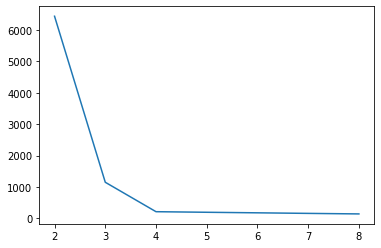

In [4]:
k_values = [2,3,4,5,6,7,8] 
SSEs = []

print("k SSE")

for k in k_values:
    model = KMeans(k).fit(X)
    SSEs.append(model.inertia_)
    print(k, model.inertia_)

plt.plot(k_values, SSEs)

In [5]:
Z = linkage(X, method="single")
cophenet(Z, Y=pdist(X))[0]

0.8618306643181228

In [6]:
db = DBSCAN()
labels = db.fit_predict(X)
confusion_matrix(y, labels) # Diagonally dominant! No permutation needed

array([[250,   0,   0,   0],
       [  0, 250,   0,   0],
       [  0,   0, 250,   0],
       [  0,   0,   0, 250]], dtype=int64)

In [7]:
accuracy_score(y, labels)

1.0

# EXTRA VIZ

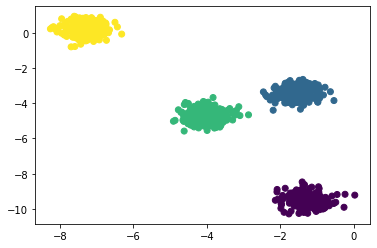

In [8]:
plt.scatter(X.Feature1, X.Feature2, c=y)

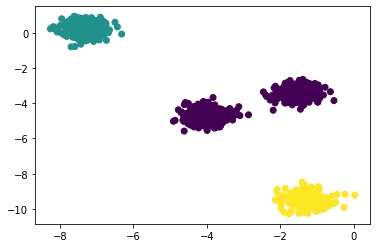

In [9]:
plt.scatter(X.Feature1, X.Feature2, c=km.predict(X))

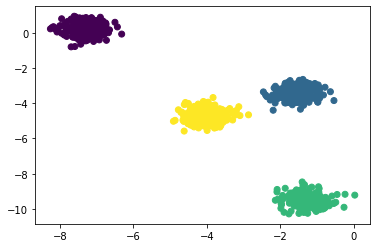

In [10]:
plt.scatter(X.Feature1, X.Feature2, c=KMeans(4).fit_predict(X))

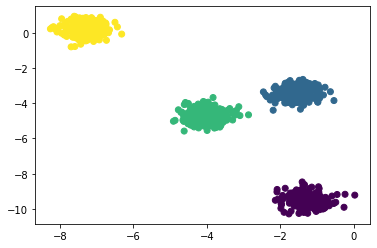

In [11]:
plt.scatter(X.Feature1, X.Feature2, c=db.fit_predict(X))